<a href="https://colab.research.google.com/github/OtienoSharon15/wine_data_analysis/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# importing the data
df = pd.read_csv('/content/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# check missing values
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


# scaling ensures that no single feature (like “price” or “age”) dominates the distance calculations just because it has larger numbers. Without scaling, the algorithm might group data based on the biggest-valued feature, not the most meaningful one. Think of it like comparing kilometers to heartbeats — you need to level the playing field before measuring similarity.

In [ ]:
# scaling
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
# elbow method- to find the optimal fit
inertias = []
silhouette_scores = []
ks = range(2, 15)
for k in ks:
    k_means = KMeans(n_clusters= k, init= "k-means++", random_state=42)
    k_means.fit(scaled_data)
    inertias.append(k_means.inertia_)
    score = silhouette_score(scaled_data, k_means.labels_)
    silhouette_scores.append(score)

Text(0.5, 1.0, 'Elbow Method - Inertia')

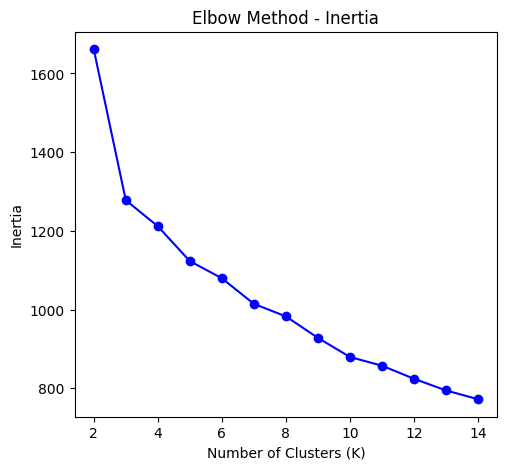

In [ ]:
# Plot Inertia vs K (Elbow Method)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')

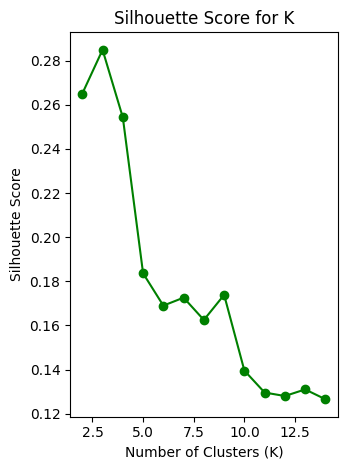

In [ ]:
# Plot Silhouette Score vs K
plt.subplot(1, 2, 2)
plt.plot(ks, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K')
plt.tight_layout()
plt.show()

In [ ]:
#  Step 4: Apply KMeans with Optimal K (based on elbow/silhouette)
optimal_k = 3  # You can change this based on the elbow/silhouette
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


plot the clusters

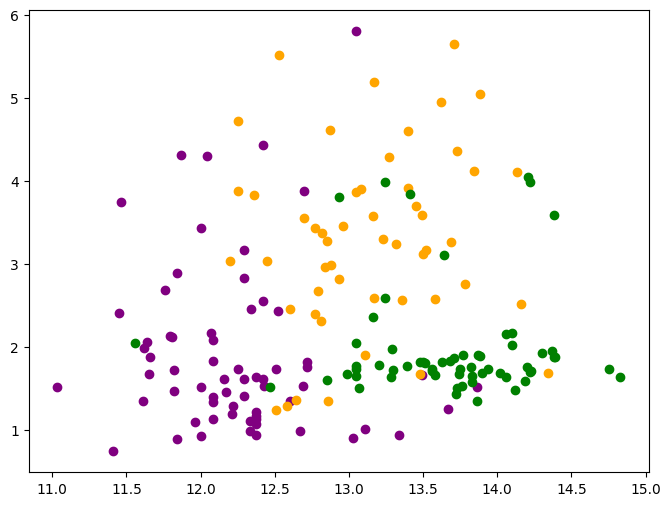

In [ ]:
#  Step 5: Visualize Clusters
plt.figure(figsize=(8, 6))
colors = ['purple', 'orange', 'green', 'blue', 'red']

for i in range(optimal_k):
    plt.scatter(df['Alcohol'][df['Cluster'] == i],
                df['Malic_Acid'][df['Cluster'] == i],
                label=f'Cluster {i+1}',
                color=colors[i]),



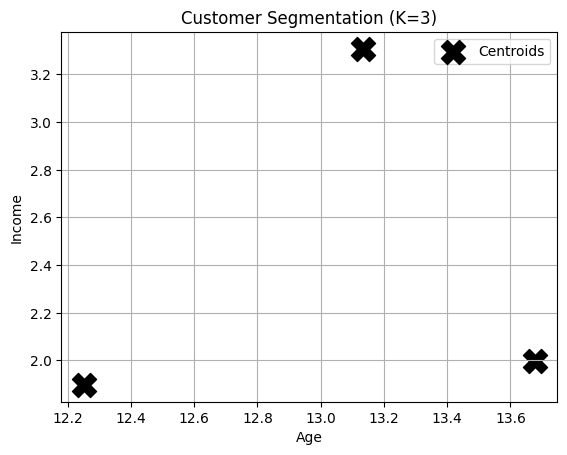

In [ ]:
# Add cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label='Centroids', marker='X')

plt.xlabel("Age")
plt.ylabel("Income")
plt.title(f"Customer Segmentation (K={optimal_k})")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#  Step 6: Evaluate Clustering Performance
print(f"Final Inertia (Total within-cluster distance): {kmeans.inertia_:.2f}")
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Final Inertia (Total within-cluster distance): 1277.93
Silhouette Score: 0.2849


In [ ]:
#  Step 7: Display Cluster Assignments
print("\nCluster Assignments:")
print(df.sort_values(by='Cluster'))


Cluster Assignments:
    Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
60    12.33        1.10  2.28          16.0        101           2.05   
62    13.67        1.25  1.92          18.0         94           2.10   
63    12.37        1.13  2.16          19.0         87           3.50   
59    12.37        0.94  1.36          10.6         88           1.98   
91    12.00        1.51  2.42          22.0         86           1.45   
..      ...         ...   ...           ...        ...            ...   
37    13.05        1.65  2.55          18.0         98           2.45   
38    13.07        1.50  2.10          15.5         98           2.40   
39    14.22        3.99  2.51          13.2        128           3.00   
47    13.90        1.68  2.12          16.0        101           3.10   
46    14.38        3.59  2.28          16.0        102           3.25   

    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
60        1.09       

HIERARCHICAL CLUSTERING

In [ ]:
# additional library
from scipy.cluster.hierarchy import linkage, dendrogram


In [ ]:
# linkage matrix
linked = linkage(scaled_data, method='ward')

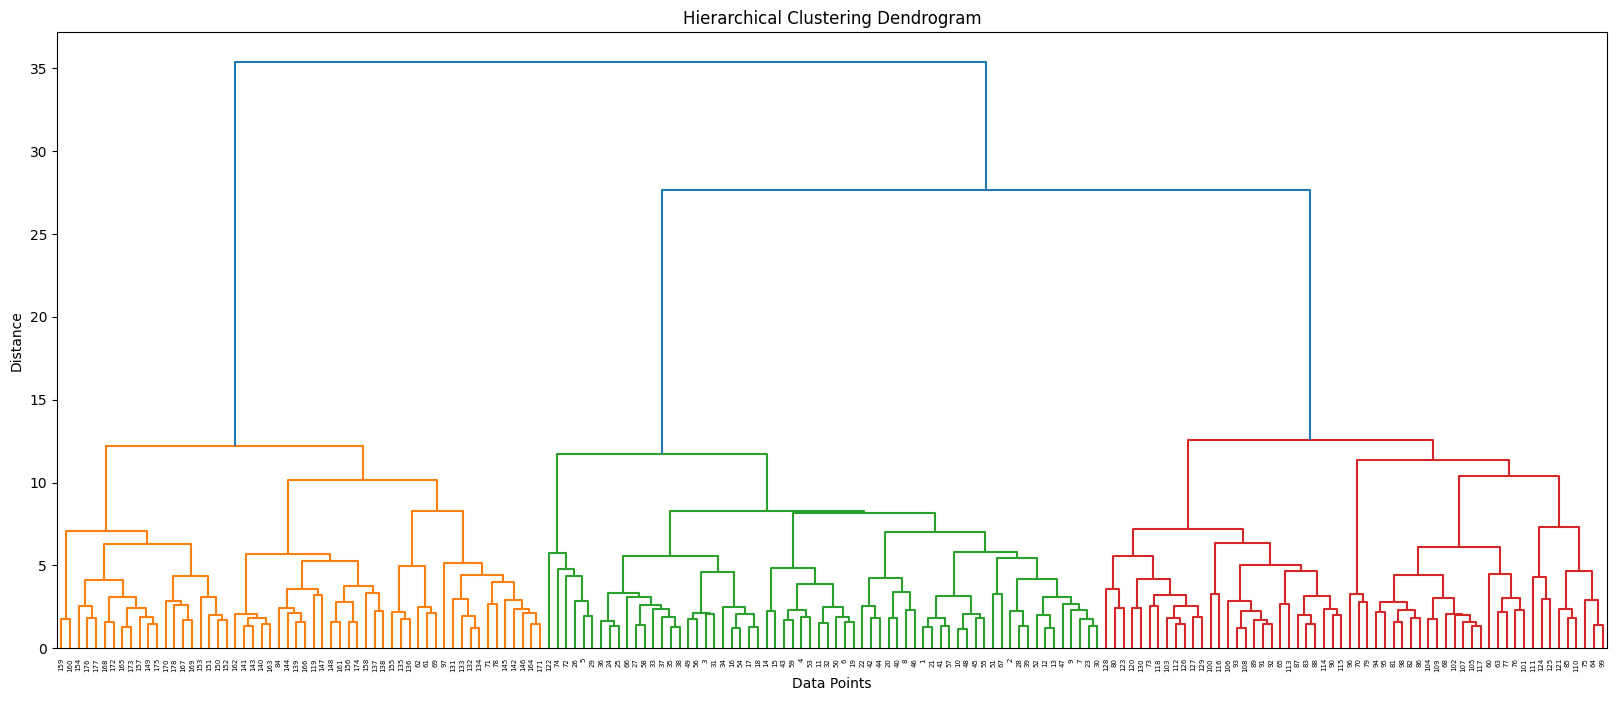

In [ ]:
# plotting the dendogram
plt.figure(figsize=(20, 8))
dendrogram(linked,
           labels=range(1, len(df)+1),
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Apply Agglomerative Clustering with 3 clusters - using ward
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['HierCluster'] = model.fit_predict(scaled_data)

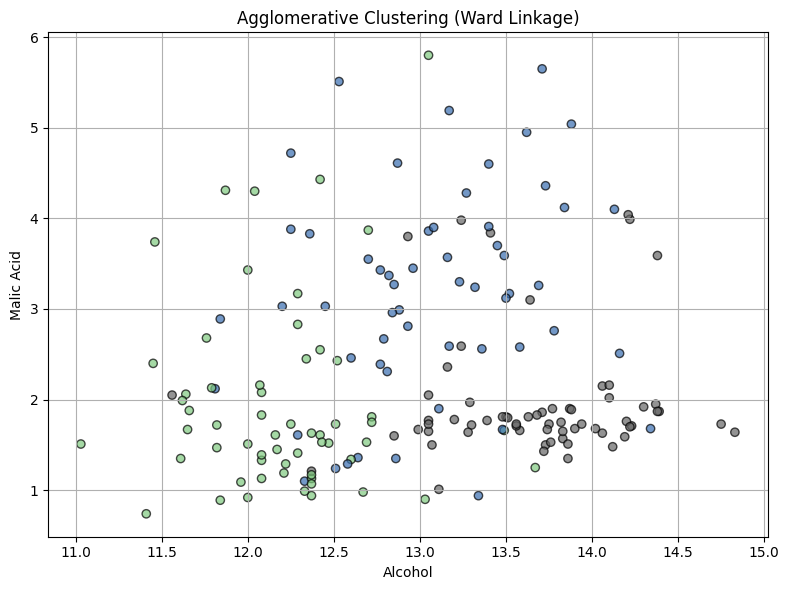

In [ ]:

# Visualize clusters using two features (e.g., Alcohol vs Malic Acid)
plt.figure(figsize=(8, 6))
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['HierCluster'], cmap='Accent', edgecolor='black', alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Agglomerative Clustering (Ward Linkage)')
plt.grid(True)
plt.tight_layout()
plt.show()

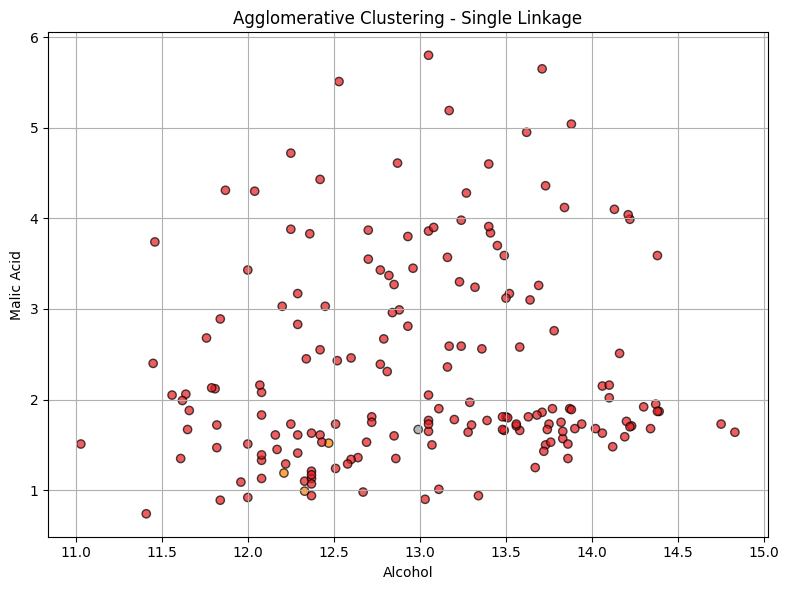

In [ ]:
# using single linkage
model_single = AgglomerativeClustering(n_clusters=3, linkage='single')
df['SingleCluster'] = model_single.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['SingleCluster'], cmap='Set1', edgecolor='black', alpha=0.7)
plt.title('Agglomerative Clustering - Single Linkage')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.grid(True)
plt.tight_layout()
plt.show()


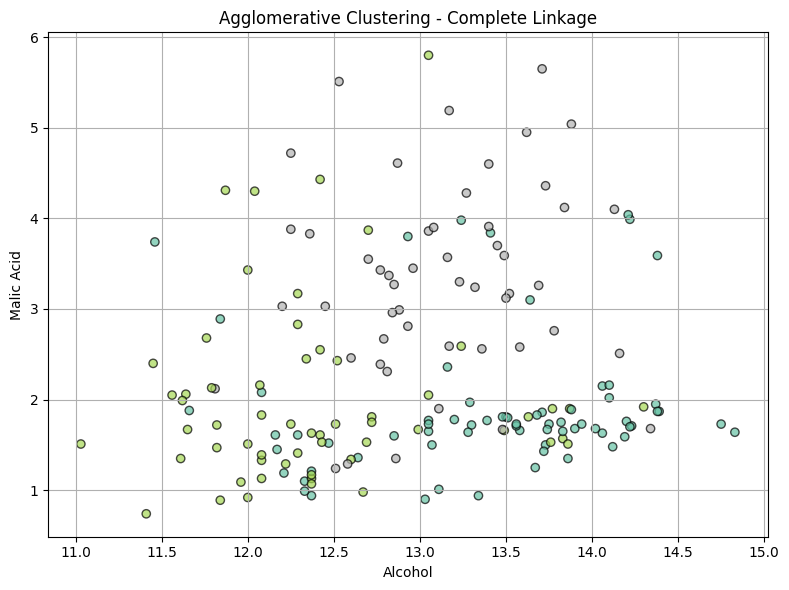

In [ ]:
# using complete linkage
model_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['CompleteCluster'] = model_complete.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['CompleteCluster'], cmap='Set2', edgecolor='black', alpha=0.7)
plt.title('Agglomerative Clustering - Complete Linkage')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.grid(True)
plt.tight_layout()
plt.show()


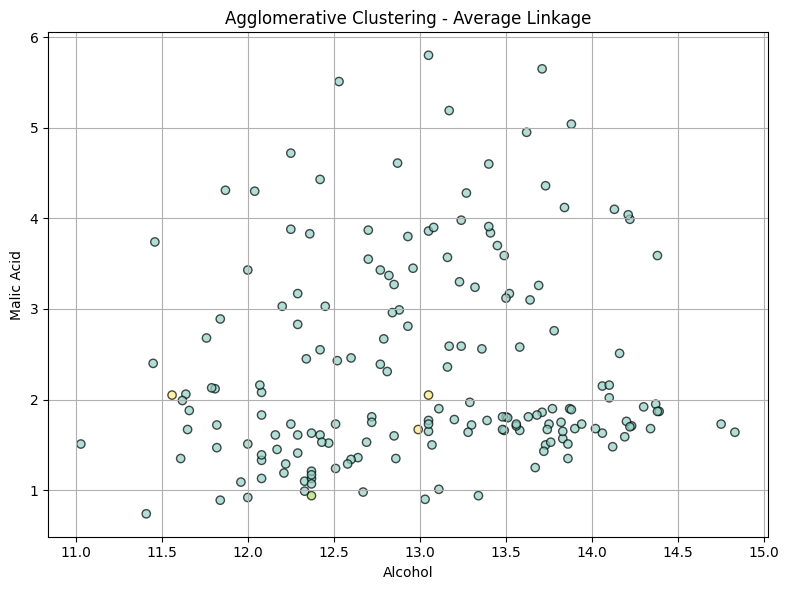

In [ ]:
# using average linkage
model_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df['AverageCluster'] = model_average.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['AverageCluster'], cmap='Set3', edgecolor='black', alpha=0.7)
plt.title('Agglomerative Clustering - Average Linkage')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# comparing silhouette scores
from sklearn.metrics import silhouette_score

print("Silhouette Scores:")
print(f"Single Linkage:   {silhouette_score(scaled_data, df['SingleCluster']):.4f}")
print(f"Complete Linkage: {silhouette_score(scaled_data, df['CompleteCluster']):.4f}")
print(f"Average Linkage:  {silhouette_score(scaled_data, df['AverageCluster']):.4f}")


Silhouette Scores:
Single Linkage:   0.1827
Complete Linkage: 0.2038
Average Linkage:  0.1575


In [ ]:
                ### Libraries
# KMeans: The clustering algorithm that groups similar data points.
# matplotlib.pyplot: Used to create plots and visualizations.
# seaborn: A prettier plotting library (optional here, but useful for styling).
# StandardScaler: Scales your data so all features have equal weight.
# silhouette_score: Measures how well your clusters are separated.
# from sklearn.cluster import AgglomerativeClustering- - it’s the tool that performs hierarchical clustering by merging data points into clusters step by step.

              #### Read data
# pd.read_csv ()- access the data, head ()- see the contents of the csv.

              #### scaling the data
# Scaling transforms your data so that all features contribute equally to the analysis.
# StandardScaler() creates a scaler object.
# fit_transform(df) standardizes each column: subtracts the mean and divides by the standard deviation. - fit_transform(df) standardizes each column.
# This ensures that features like "Alcohol" and "Magnesium" don’t dominate just because they have larger numbers.
# pd.DataFrame(..., columns=df.columns) keeps your column names intact after scaling.

            #### optimal clustering
# - inertias: Will store how tightly grouped each cluster is (lower is better).
# silhouette_scores: Will store how well-separated the clusters are (higher is better).
# ks = range(2, 15): You’ll test cluster counts from 2 to 14.

          #### Looping through different values
# for k in ks: You're looping through values of k (number of clusters), from 2 to 14. This lets you test multiple clustering scenarios.
# k_means = KMeans(n_clusters=k, init="k-means++", random_state=42)- Creates a KMeans model with:
  # n_clusters=k: The current number of clusters you're testing.
  # init="k-means++": A smarter way to initialize centroids, which improves convergence.
  # random_state=42: Ensures reproducibility — same results every time you run it.
# k_means.fit(scaled_data)- This trains the model on your scaled data. It finds k centroids and assigns each data point to the nearest one.
# inertias.append(k_means.inertia_)- Inertia is the sum of squared distances from each point to its assigned cluster center. Lower inertia means tighter clusters. You're storing this value to later plot the Elbow Curve.
# score = silhouette_score(scaled_data, k_means.labels_)
  # Silhouette Score measures how well each point fits within its cluster vs. others.It ranges from -1 to 1:c- Close to 1: Well-separated clusters. Close to 0: Overlapping clusters. - Negative: Misclassified points.
# silhouette_scores.append(score)- Adds the silhouette score to your list so you can later plot it and compare across k.

      🧠 Why This Matters
- This loop helps you answer two key questions:
- How many clusters best represent your data?
- Are those clusters meaningful and well-separated?
- By plotting both inertia and silhouette score, you get a clearer picture:
- The Elbow Method shows where adding more clusters stops improving compactness.
- The Silhouette Score shows where clusters are most distinct.

              #### plotting
# plt.figure(figsize=(12, 5)): Creates a wide figure with space for two plots.
# plt.subplot(1, 2, 1): First plot — Elbow Method. Shows how inertia drops as k increases. Look for the “elbow” — where the drop slows down.
# plt.subplot(1, 2, 2): Second plot — Silhouette Score.
# Shows how well-separated clusters are.
# Look for the peak — best separation.
# plt.tight_layout(): Prevents overlap.
# plt.show(): Displays the plots.



# model = AgglomerativeClustering(n_clusters=3, linkage='ward/single/complete/average')- - You’re creating a clustering model that will group your data into 3 clusters.
# linkage='ward','single', 'complete', or 'average' to try different merging strategies.
# df['Cluster'] = model.fit_predict(scaled_data)- - Fits the model to your scaled data. Predicts which cluster each data point belongs to.
                ### visualize
# plt.scatter(...): Creates a scatter plot using two features — 'Alcohol' and 'Malic_Acid'.
# c=df['Cluster']: Colors each point based on its cluster assignment.
# cmap='Accent': Chooses a color palette for the clusters.
# plt.xlabel(...) and plt.ylabel(...): Label the axes so you know what features you’re plotting.
# plt.title(...): Adds a title to the plot.
# plt.show(): Displays the plot.









